In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, roc_auc_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import r2_score


In [84]:
df = pd.read_csv('data/pokemon.csv')
df = df.drop(['type2', 'percentage_male', 'height_m'], axis=1)

In [81]:
df.head()
df.isna().any()

abilities            False
against_bug          False
against_dark         False
against_dragon       False
against_electric     False
against_fairy        False
against_fight        False
against_fire         False
against_flying       False
against_ghost        False
against_grass        False
against_ground       False
against_ice          False
against_normal       False
against_poison       False
against_psychic      False
against_rock         False
against_steel        False
against_water        False
attack               False
base_egg_steps       False
base_happiness       False
base_total           False
capture_rate         False
classfication        False
defense              False
experience_growth    False
height_m              True
hp                   False
japanese_name        False
name                 False
pokedex_number       False
sp_attack            False
sp_defense           False
speed                False
type1                False
weight_kg             True
g

In [82]:
columns_with_nan = df.columns[df.isna().any()]
df_with_nan_columns = df[columns_with_nan]

In [83]:
df_with_nan_columns

,height_m,weight_kg
0,0.7,6.9
1,1.0,13.0
2,2.0,100.0
3,0.6,8.5
4,1.1,19.0
...,...,...
796,9.2,999.9
797,0.3,0.1
798,5.5,888.0
799,2.4,230.0


In [143]:
df['weight_kg'].describe()

count    801.000000
mean      61.378105
std      107.979179
min        0.100000
25%        9.300000
50%       28.500000
75%       61.500000
max      999.900000
Name: weight_kg, dtype: float64

In [144]:
df['weight_kg'].fillna(df['weight_kg'].mean(), inplace=True)

In [186]:
#Wpływ wagi pokemona na jego życie, atak, obrone
df1 = df[['name','attack']]#, 'defense', 'hp']]

In [187]:
train_x, test_x, train_y, test_y = train_test_split(df['weight_kg'],df1['attack'], test_size=0.3)

In [147]:
test_x.describe()

count    241.000000
mean      66.725687
std      111.731039
min        0.100000
25%       11.000000
50%       30.000000
75%       80.000000
max      950.000000
Name: weight_kg, dtype: float64

In [148]:
train_x = train_x.to_numpy().reshape(-1,1)
train_y = train_y.to_numpy().reshape(-1,1)

In [149]:
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression()

In [150]:
b = model.intercept_[0]
a = model.coef_[0][0]

print(a)
print(b)

0.10398131101221786
71.29283793475275


In [151]:
def linear_reg(a,b,x):
    return a*x + b

y_pred = linear_reg(a,b,test_x)
y_pred

389    71.937522
311    71.729559
363    80.401601
100    78.217993
123    75.514479
         ...    
49     77.675014
652    72.270262
633    76.491903
578    73.382862
756    71.791948
Name: weight_kg, Length: 241, dtype: float64

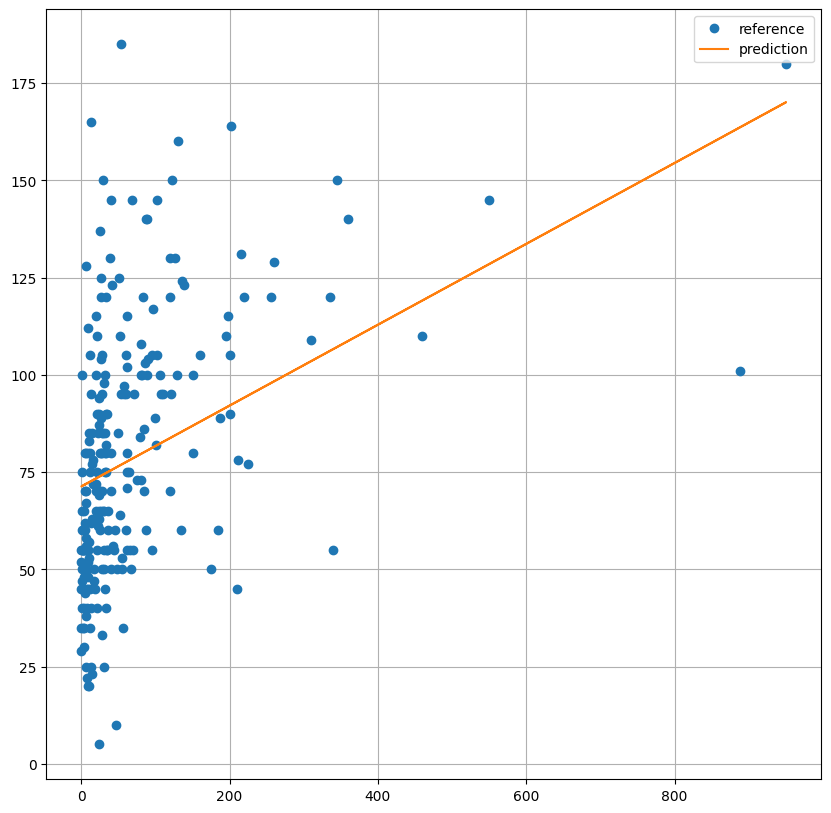

In [152]:
fig = plt.figure(figsize=(10,10))
plt.plot(test_x,test_y,marker='o', linestyle='none')
plt.plot(test_x,y_pred)
plt.grid()
plt.legend(["reference", "prediction"])
plt.show()

In [153]:
R2 = r2_score(test_y, y_pred)
R2

0.18465711527265094

<ErrorbarContainer object of 3 artists>

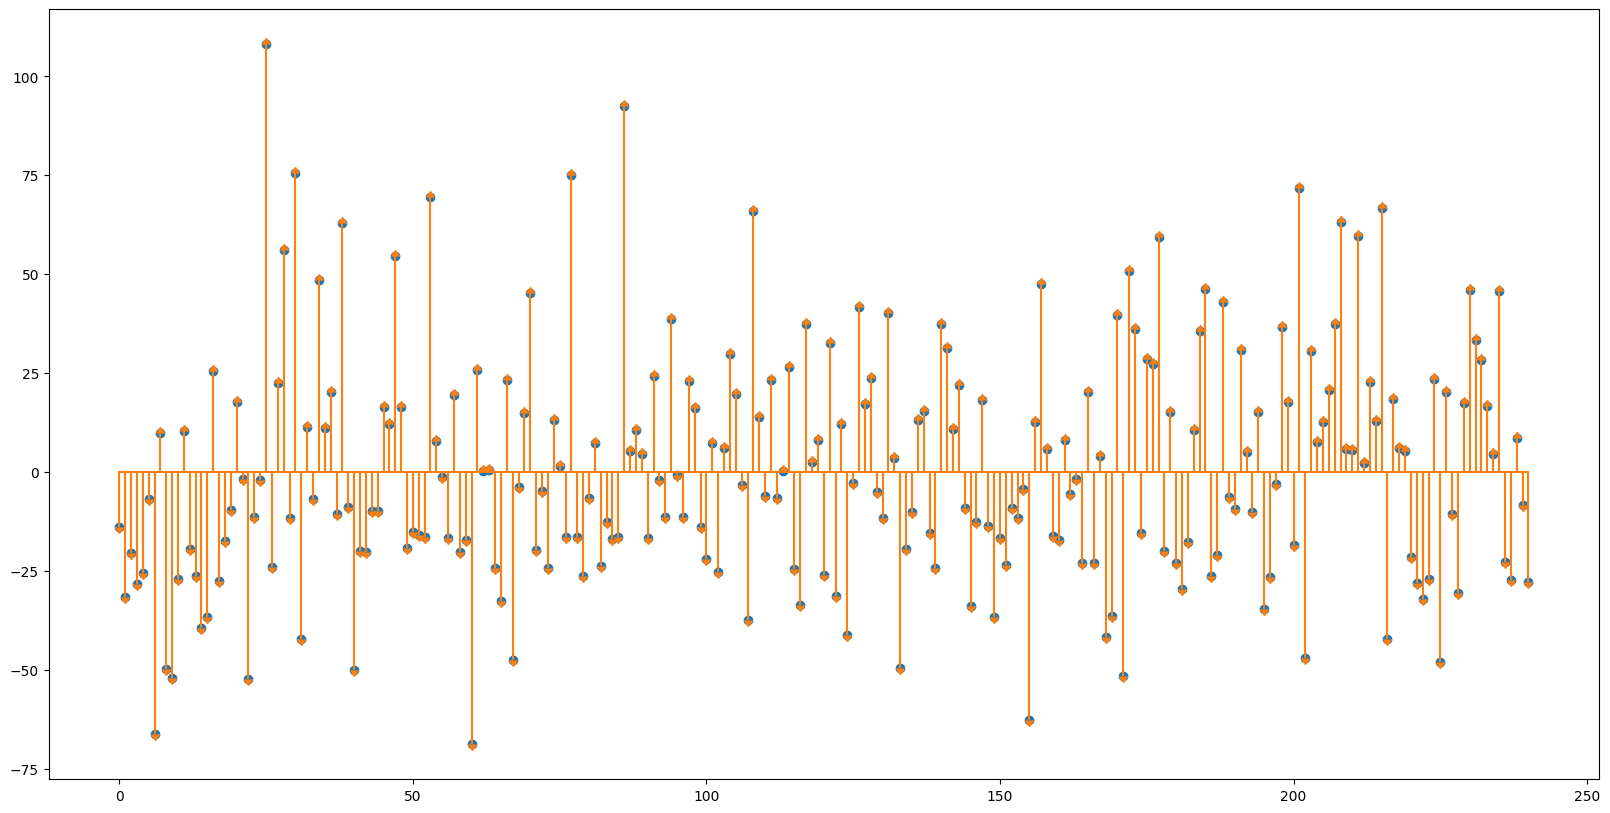

In [154]:
fig = plt.figure(figsize=(20,10))
y_error = test_y - y_pred
y_error = y_error.to_numpy().reshape(-1)
y_error
lolims = np.greater(y_error, 0)
uplims = np.less(y_error, 0)
x = np.arange(0, len(y_error))
h = [0]*len(y_error)
plt.plot(y_error, linestyle='none', marker='o')
plt.errorbar(x,h, yerr = np.abs(y_error), label = 'both limits (default)', lolims=lolims, uplims=uplims)

In [174]:
y, x = df1, df['weight_kg']
x = x.to_numpy().reshape(-1,1)
y = y.to_numpy().reshape(-1,1)

In [159]:
model.fit(x, y)
b = model.intercept_[0]
a = model.coef_[0][0]

print(a)
print(b)

y_pred_all = linear_reg(a,b,x)

0.11261838836211194
70.94537463752222


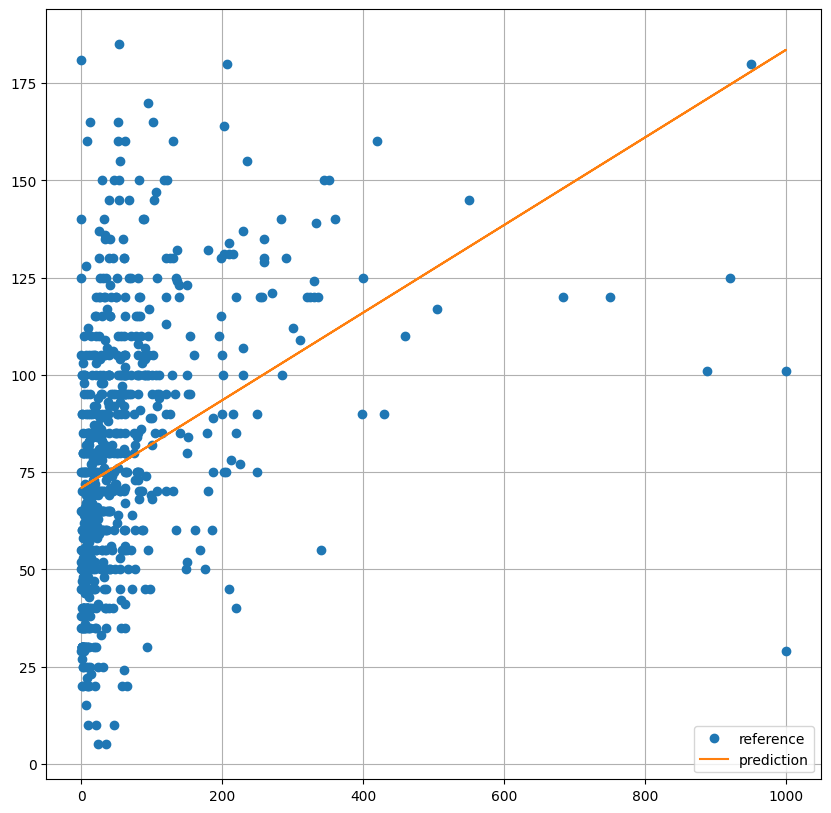

In [160]:
fig = plt.figure(figsize=(10,10))
plt.plot(x,y,marker='o', linestyle='none')
plt.plot(x,y_pred_all)
plt.grid()
plt.legend(["reference", "prediction"])
plt.show()

<ErrorbarContainer object of 3 artists>

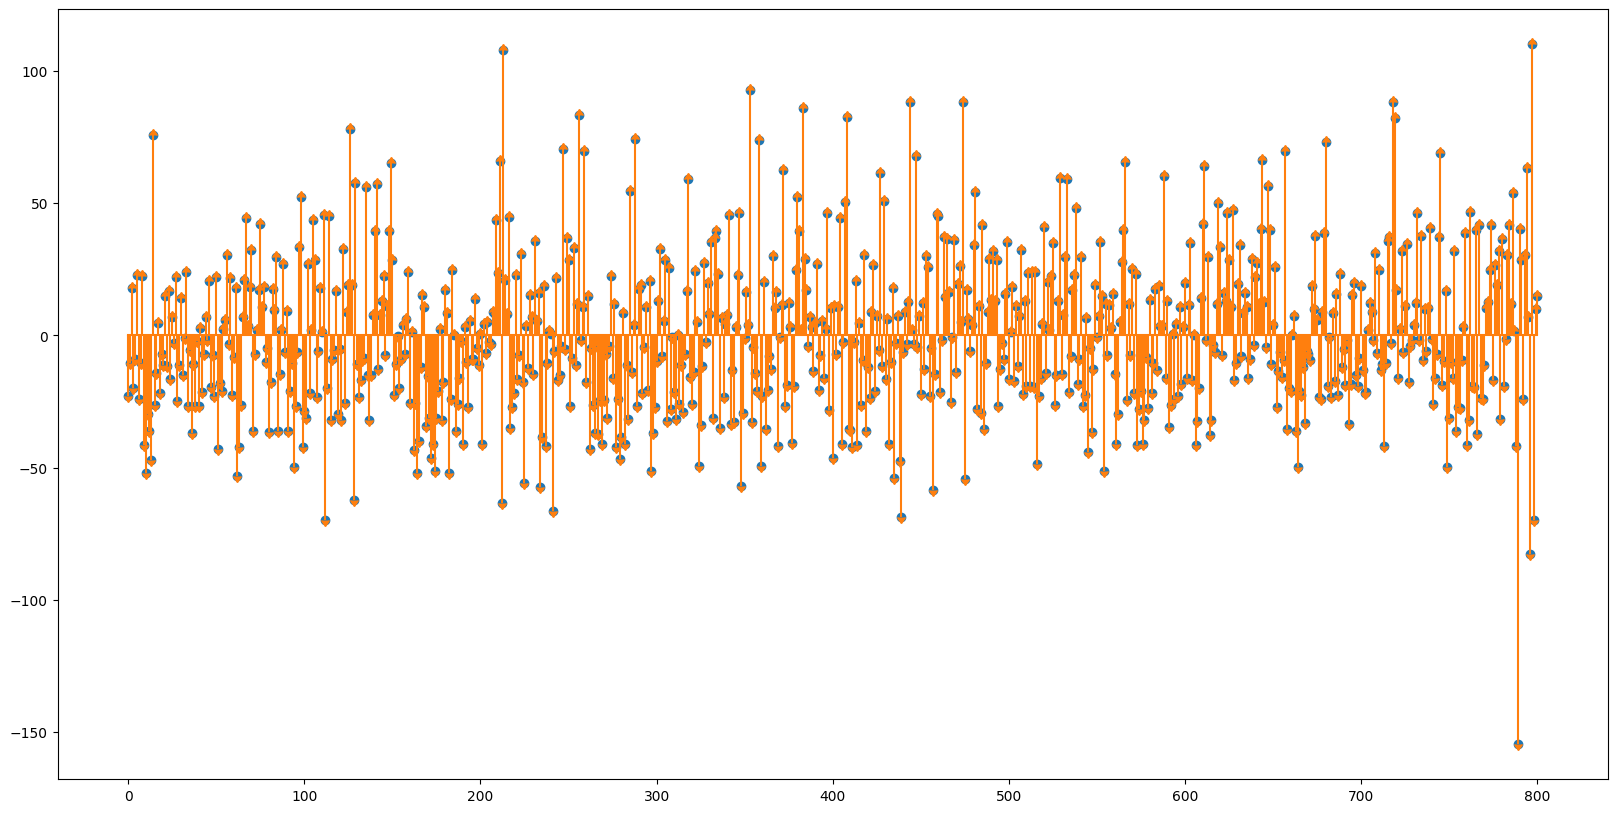

In [161]:
fig = plt.figure(figsize=(20,10))
y_error_all = y - y_pred_all
y_error_all = y_error_all.reshape(-1)
y_error_all
lolims = np.greater(y_error_all, 0)
uplims = np.less(y_error_all, 0)
x = np.arange(0, len(y_error_all))
h = [0]*len(y_error_all)
plt.plot(y_error_all, linestyle='none', marker='o')
plt.errorbar(x,h, yerr = np.abs(y_error_all), label = 'both limits (default)', lolims=lolims, uplims=uplims)

In [165]:
y_best = df1[df['attack'] > 125]
x_best = df['weight_kg'][df['attack'] > 125]
x_best = x_best.to_numpy().reshape(-1,1)
y_best = y_best.to_numpy().reshape(-1,1)


In [175]:
model.fit(x, y)
b = model.intercept_[0]
a = model.coef_[0][0]

print(a)
print(b)

y_pred_best = linear_reg(a,b,x_best)


0.11261838836211194
70.94537463752222


In [195]:
y_names = df1['name'][df['attack'] > 125]
y_names.to_numpy()

array(['Beedrill', 'Machamp', 'Kingler', 'Rhydon', 'Pinsir', 'Gyarados',
       'Flareon', 'Aerodactyl', 'Dragonite', 'Mewtwo', 'Scizor',
       'Heracross', 'Ursaring', 'Tyranitar', 'Ho-Oh', 'Blaziken',
       'Swampert', 'Breloom', 'Slaking', 'Aggron', 'Sharpedo', 'Banette',
       'Absol', 'Salamence', 'Metagross', 'Latios', 'Kyogre', 'Groudon',
       'Rayquaza', 'Rampardos', 'Lopunny', 'Garchomp', 'Lucario',
       'Abomasnow', 'Rhyperior', 'Mamoswine', 'Gallade', 'Regigigas',
       'Gigalith', 'Excadrill', 'Conkeldurr', 'Archeops', 'Escavalier',
       'Haxorus', 'Beartic', 'Terrakion', 'Zekrom', 'Landorus',
       'Meloetta', 'Greninja', 'Aegislash', 'Xerneas', 'Yveltal',
       'Diancie', 'Hoopa', 'Crabominable', 'Wishiwashi', 'Dhelmise',
       'Tapu Bulu', 'Solgaleo', 'Buzzwole', 'Pheromosa', 'Kartana'],
      dtype=object)

array([[150],
       [130],
       [130],
       [130],
       [155],
       [155],
       [130],
       [135],
       [134],
       [150],
       [150],
       [185],
       [130],
       [164],
       [130],
       [160],
       [150],
       [130],
       [160],
       [140],
       [140],
       [165],
       [150],
       [145],
       [145],
       [130],
       [150],
       [180],
       [180],
       [165],
       [136],
       [170],
       [145],
       [132],
       [140],
       [130],
       [165],
       [160],
       [135],
       [135],
       [140],
       [140],
       [135],
       [147],
       [130],
       [129],
       [150],
       [145],
       [128],
       [145],
       [150],
       [131],
       [131],
       [160],
       [160],
       [132],
       [140],
       [131],
       [130],
       [137],
       [139],
       [137],
       [181]], dtype=int64)

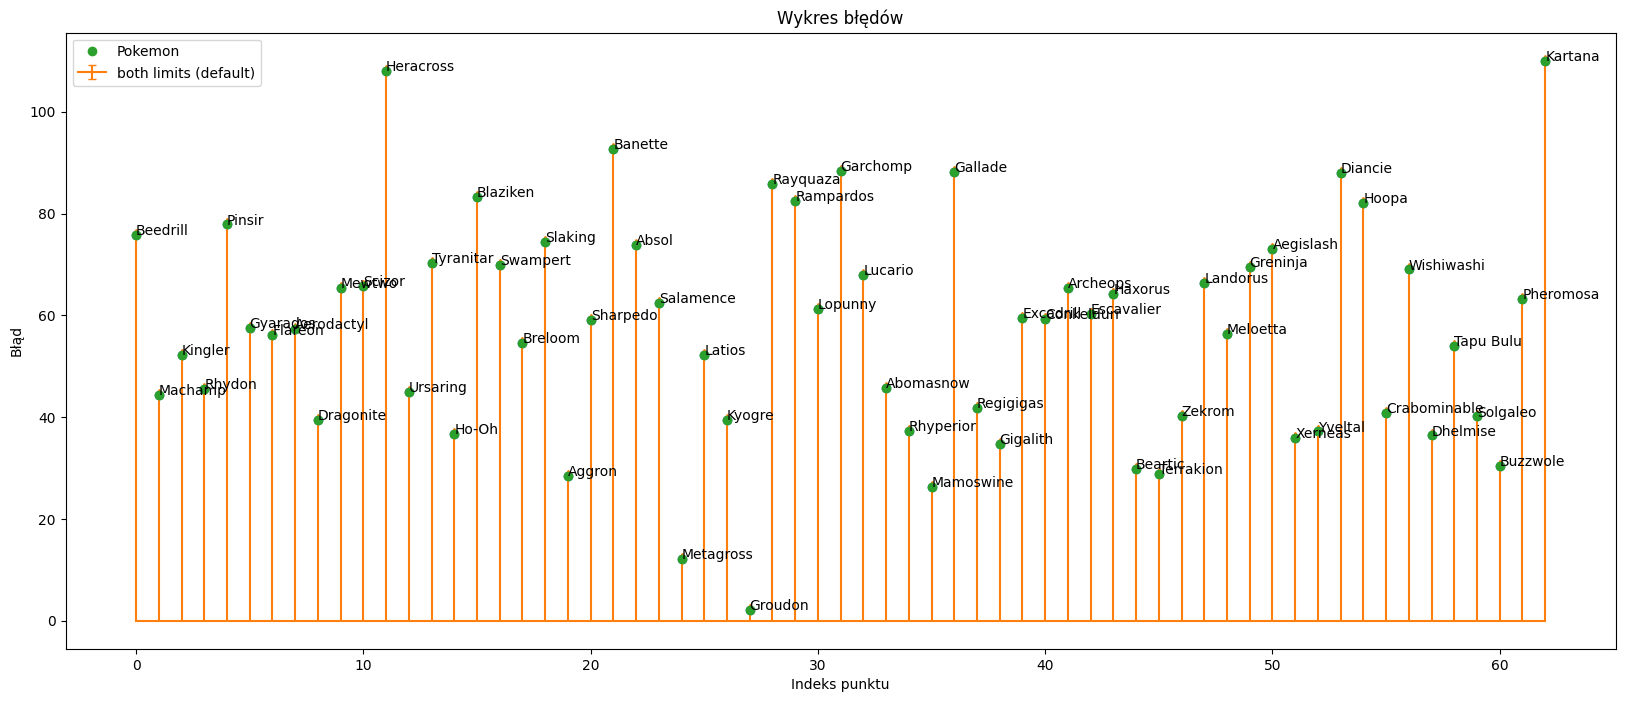

NameError: name 'edited' is not defined

In [209]:
fig = plt.figure(figsize=(20,8))
y_error_best = y_best - y_pred_best
y_error_best = y_error_best.reshape(-1)
y_error_best
lolims = np.greater(y_error_best, 0)
uplims = np.less(y_error_best, 0)
x = np.arange(0, len(y_error_best))
h = [0]*len(y_error_best)
plt.plot(y_error_best, linestyle='none', marker='o')
plt.errorbar(x,h, yerr = np.abs(y_error_best), label = 'both limits (default)', lolims=lolims, uplims=uplims)

plt.plot(y_error_best, linestyle='none', marker='o', label='Pokemon')
# Ustawienie etykiet dla punktów
# for i, txt in enumerate(y_names):
#     plt.annotate(str(txt), (i, y_names[i]), textcoords="offset points", xytext=(0,10), ha='center')
i = 0
for name in y_names:
    plt.annotate(f'{name}', xy = (i, y_error_best[i]))
    i += 1
# Wyświetlenie wykresu
plt.xlabel("Indeks punktu")
plt.ylabel("Błąd")
plt.title("Wykres błędów")
plt.legend()
plt.show() (edited) 